In [17]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
Pima_Df = pd.read_csv('diabetes.csv')

In [3]:
Pima_Df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
Pima_Df.shift()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
2,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
3,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
...,...,...,...,...,...,...,...,...,...
763,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33.0,0.0
764,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
765,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
766,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0


In [6]:
Pima_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
Pima_Df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
Pima_Df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


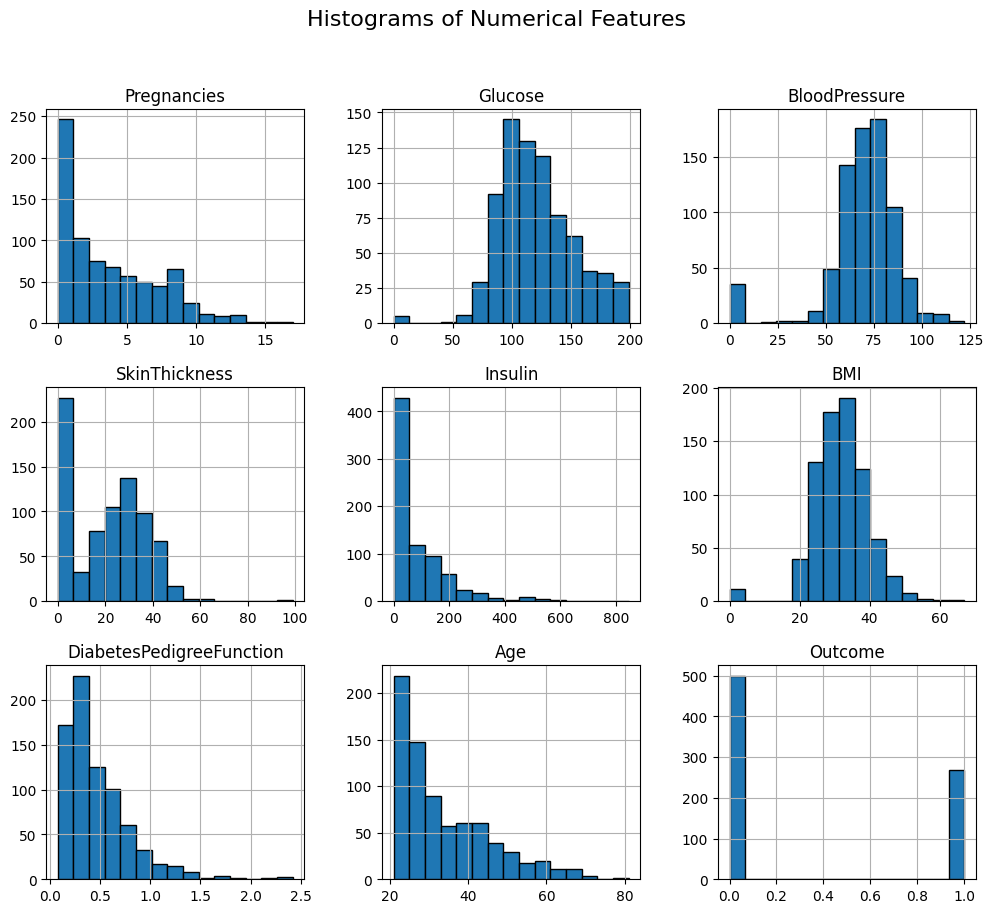

In [16]:
# Histograms for All Numerical Features
# Plot histograms
Pima_Df.hist(figsize=(12, 10), bins=15, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

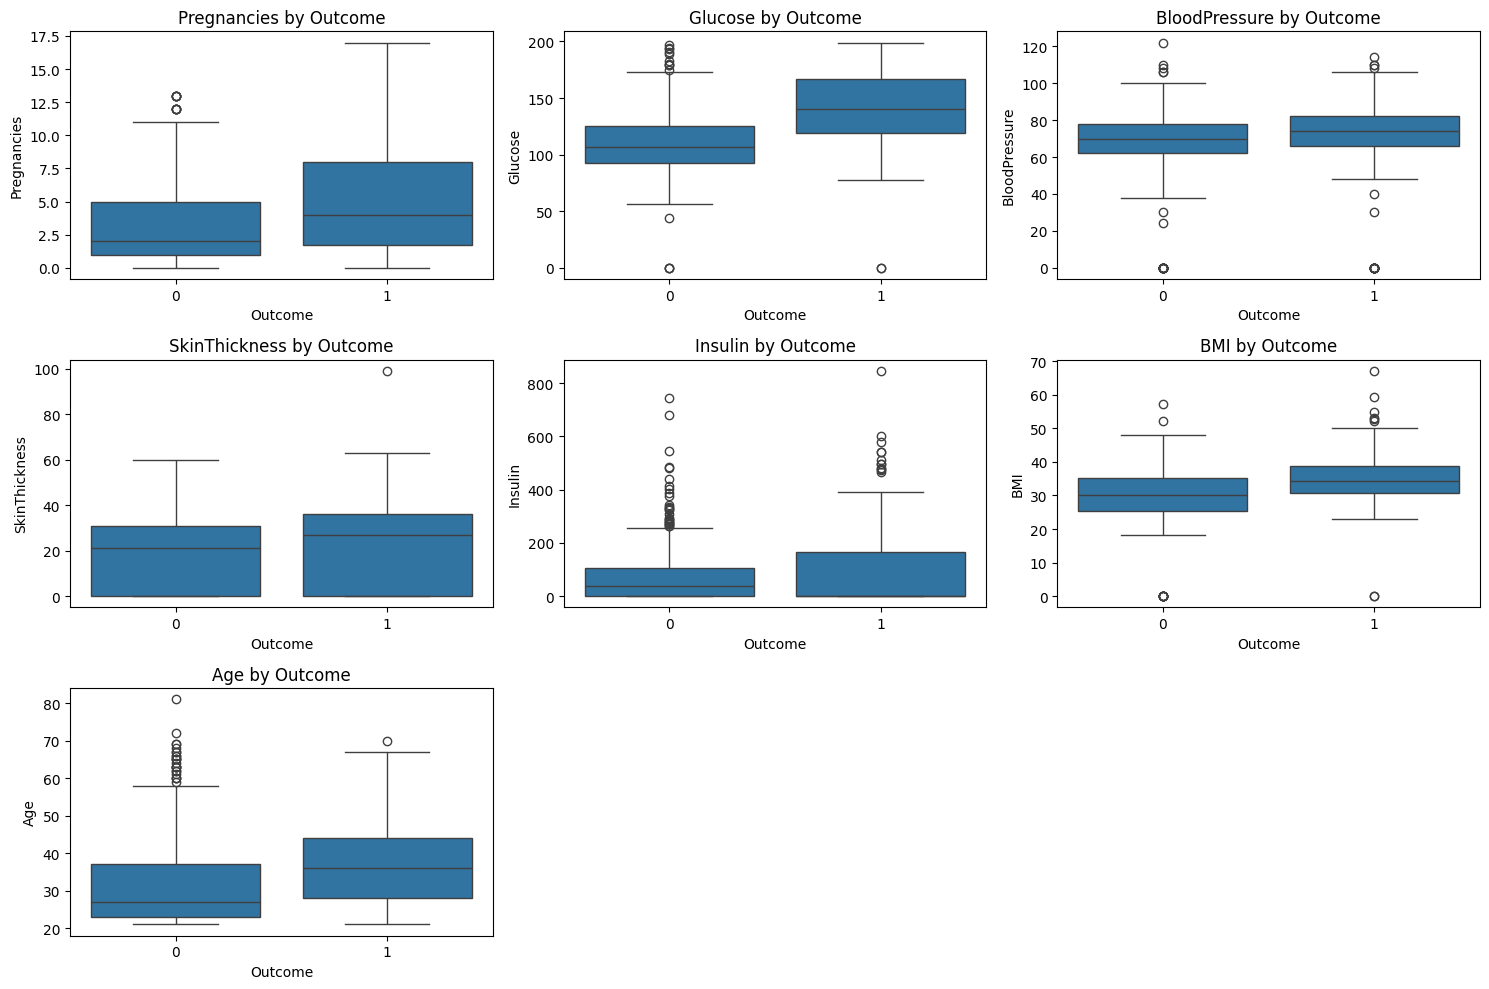

In [18]:
# Plot box plots for numerical features grouped by Outcome
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=Pima_Df, x='Outcome', y=feature)
    plt.title(f'{feature} by Outcome')

plt.tight_layout()
plt.show()

In [20]:
# Checking zero percentages in key columns

columns_with_possible_zeros = Pima_Df.columns
zero_percentages = (Pima_Df[columns_with_possible_zeros] == 0).mean() * 100

# Display the percentage of zero values for each column
zero_percentages.sort_values(ascending=False)

Outcome                     65.104167
Insulin                     48.697917
SkinThickness               29.557292
Pregnancies                 14.453125
BloodPressure                4.557292
BMI                          1.432292
Glucose                      0.651042
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

In [21]:
from sklearn.impute import KNNImputer

In [24]:
# Create a copy of the dataframe to avoid overwriting the original
Pima_Df_cleaned = Pima_Df.copy()

# Define the columns to impute with KNN (for advanced handling)
knn_columns = ['Insulin', 'SkinThickness']


# Use median imputation for simpler cases
median_columns = ['BloodPressure', 'BMI', 'Glucose']

# Median Imputation
for col in median_columns:
    Pima_Df_cleaned[col] = Pima_Df_cleaned[col].replace(0, Pima_Df_cleaned[col].median())

# KNN Imputation for Insulin and SkinThickness
# Replace zero values with NaN for columns to be imputed
Pima_Df_cleaned[knn_columns] = Pima_Df_cleaned[knn_columns].replace(0, np.nan)

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
Pima_Df_cleaned[knn_columns] = imputer.fit_transform(Pima_Df_cleaned[knn_columns])

# Pregnancies: Keep as-is unless advised otherwise
# Outcome: Keep as-is unless zeros are confirmed to be missing

In [25]:
Pima_Df_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00000,213.400000,33.6,0.627,50,1
1,1,85,66,29.00000,140.600000,26.6,0.351,31,0
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1


In [26]:
print((Pima_Df_cleaned[['Insulin', 'SkinThickness']] == 0).sum())

Insulin          0
SkinThickness    0
dtype: int64


In [27]:
# Feature Engineering: Adding new columns for better insights
Pima_Df_cleaned['BMI_Category'] = pd.cut(
    Pima_Df_cleaned['BMI'],
    bins=[0, 18.5, 24.9, 29.9, 100],  # Categories: Underweight, Normal, Overweight, Obese
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

Pima_Df_cleaned['Age_Group'] = pd.cut(
    Pima_Df_cleaned['Age'],
    bins=[0, 20, 30, 40, 50, 100],  # Age ranges
    labels=['<20', '20-30', '30-40', '40-50', '50+']
)

# Creating interaction terms
Pima_Df_cleaned['BMI_Age_Interaction'] = Pima_Df_cleaned['BMI'] * Pima_Df_cleaned['Age']

# Encoding categorical features into numeric form (optional for modeling)
Pima_Df_cleaned = pd.get_dummies(Pima_Df_cleaned, columns=['BMI_Category', 'Age_Group'], drop_first=True)

# Display the updated dataset
Pima_Df_cleaned.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Age_Interaction,BMI_Category_Normal,BMI_Category_Overweight,BMI_Category_Obese,Age_Group_20-30,Age_Group_30-40,Age_Group_40-50,Age_Group_50+
0,6,148,72,35.00000,213.400000,33.6,0.627,50,1,1680.0,False,False,True,False,False,True,False
1,1,85,66,29.00000,140.600000,26.6,0.351,31,0,824.6,False,True,False,False,True,False,False
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1,745.6,True,False,False,False,True,False,False
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0,590.1,False,True,False,True,False,False,False
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1,1422.3,False,False,True,False,True,False,False


In [32]:
# Recreate BMI_Category from one-hot encoded columns
if 'BMI_Category' not in Pima_Df_cleaned.columns:
    Pima_Df_cleaned['BMI_Category'] = pd.cut(
        Pima_Df_cleaned['BMI'],
        bins=[0, 18.5, 24.9, 29.9, 100],
        labels=['Underweight', 'Normal', 'Overweight', 'Obese']
    )

if 'Age_Group' not in Pima_Df_cleaned:
    Pima_Df_cleaned['Age_Group'] = pd.cut(
        Pima_Df_cleaned['Age'],
        bins=[0, 20, 30, 40, 50, 100],  # Age ranges
        labels=['<20', '20-30', '30-40', '40-50', '50+']
    )

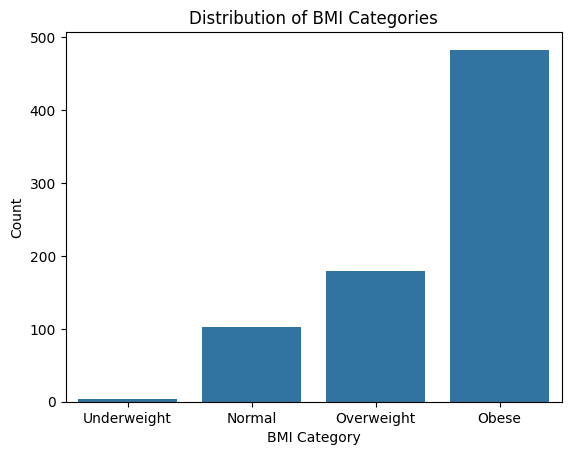

In [31]:
# Count plot for BMI Categories
sns.countplot(x='BMI_Category', data=Pima_Df_cleaned)
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

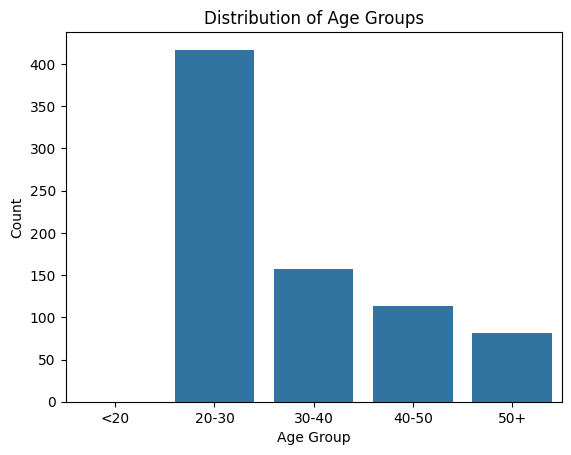

In [33]:
# Count plot for Age Groups
sns.countplot(x='Age_Group', data=Pima_Df_cleaned)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

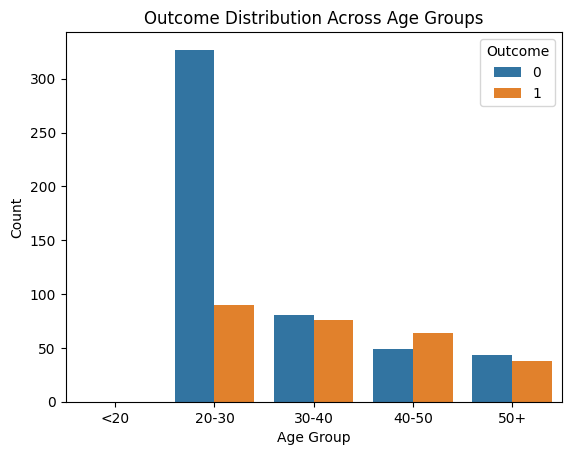

In [34]:
# Outcome by Age Group
sns.countplot(x='Age_Group', hue='Outcome', data=Pima_Df_cleaned)
plt.title('Outcome Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Outcome', loc='upper right')
plt.show()

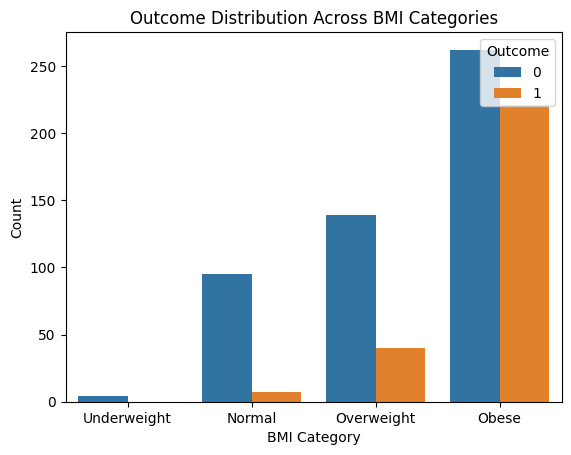

In [35]:
# Outcome by BMI Category
sns.countplot(x='BMI_Category', hue='Outcome', data=Pima_Df_cleaned)
plt.title('Outcome Distribution Across BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Outcome', loc='upper right')
plt.show()

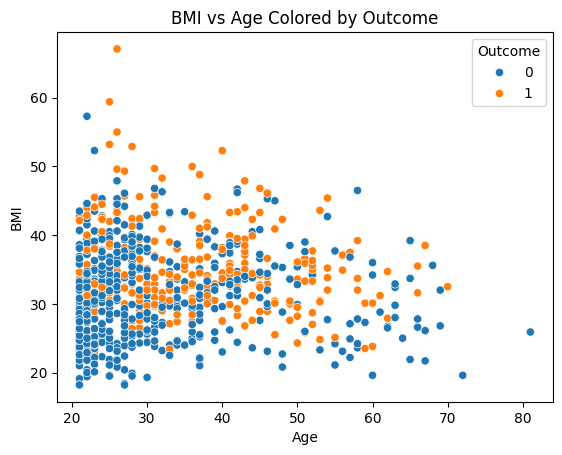

In [36]:
# Scatter plot of BMI vs Age colored by Outcome
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=Pima_Df_cleaned)
plt.title('BMI vs Age Colored by Outcome')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Outcome', loc='upper right')
plt.show()